# EXPLORATORY DATA ANALYSIS ON NETFLIX MOVIES & TV SHOWS

This is a project on the exploratory data analysis of the world's leading streaming entertainment service 'Netflix'.The name of the dataset to be used is 'Netflix Movies and Tv Shows' and was downloaded from kaggle. This project aims to understand and analyse the dataset using visualizations. The tools to be used are the numpy, pandas, matplotlib and seaborn libraries in python programming language.The techniques to be used are data importation,data cleaning, data preparation and data analysis.

Let's start by installing and importing the packages and libraries that will be used in this project:

In [1]:
project_name = "course_project_netflix_movies_and_tvshows"

In [2]:
!pip install jovian --upgrade -q

In [3]:
import jovian
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
%matplotlib inline

In [33]:
jovian.commit(project="course_project_netflix_movies_and_tvshows")

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "alayandeay98/course-project-netflix-movies-and-tvshows" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/alayandeay98/course-project-netflix-movies-and-tvshows


'https://jovian.ml/alayandeay98/course-project-netflix-movies-and-tvshows'

Next,let's load the dataframe from the csv file and observe what the dataframe looks like. To do that, we'll use the read_csv command to import the dataframe and the function 'head()' to have a glimpse of the dataframe

In [5]:
netflix_df= pd.read_csv('netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


## Data Preparation and Cleaning


Before exploring the dataframe it is important to clean and prepare it. The first step in doing this is to get information on the dataframe. The function 'info()' would be used to perform this step

In [6]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


The output above shows that the dataframe contains 12 columns and 6234 rows, of the 12 columns 10 are objects while two are integers

In [7]:
netflix_df.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

still getting information on the data,we can see that for each of the columns, there are alot different unique values for some of them. It makes sense that the show_id column unique count has the same number as the number of rows because it is a unique key used to identify a movie/show. Title, director, cast, country, date_added, listed_in, and description contain many unique values as well

Next, let's check if the dataframe contains null values

In [8]:
netflix_df.isnull().values.any()

True

Let's see the total number of null values it contains

In [9]:
netflix_df.isnull().sum().sum()

3036

now let's check the colmns that have null values and the amount of null values they have

In [10]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

director, cast, country, date_added and rating columns have 1969, 570, 476, 11, 10 number of null values respectively. Now that we know the columns that have null values and their amounts we'll treat them accordingly

Since 'director', 'cast', and 'country' contain the majority of null values, I will treat each missing value in the director and cast column as unavailable while i replace that of country with 'united states'. What informed my decision is because Netflix was created in the USA and every show is aired on Netflix US.
 

The other two fields 'date_added' and 'rating' contains an insignificant portion of the data but I will drop data_added and replace the Nan values in the rating field with 'no-rating'

In [11]:
netflix_df['director'].fillna('No Director', inplace=True)
netflix_df['cast'].fillna('No Cast', inplace=True)
netflix_df['country'].fillna('United States', inplace=True)
netflix_df['rating'].fillna('No Rating', inplace=True)
netflix_df.dropna(subset=['date_added'],inplace=True)

In [12]:
netflix_df.isnull().any()

show_id         False
type            False
title           False
director        False
cast            False
country         False
date_added      False
release_year    False
rating          False
duration        False
listed_in       False
description     False
dtype: bool

after handling the null values, we can see that our dataframe had no more null values.

Since we are analysing a movie and tv show dataset, it would make sense to have datasets for both so as to simplify our analysis and dig deep into the movie dataset or tv show dataset.

In [13]:
netflix_shows_df=netflix_df[netflix_df['type'].str.contains('TV Show')]
netflix_shows_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,No Director,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,No Director,No Cast,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,No Director,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",United States,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...


In [14]:
netflix_movies_df=netflix_df[netflix_df['type'].str.contains('Movie')]
netflix_movies_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


after splitting the dataframe into two, i noticed that the duration column in the tv shows dataframe is in mins while the duration column in movies dataframe is in seasons

let's separate the year from the date added column in other to be able to perform analysis on year added

In [15]:
netflix_df['year_added'] = pd.DatetimeIndex(netflix_df['date_added']).year
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6218,80162994,TV Show,Talking Tom and Friends,No Director,"Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...","Cyprus, Austria, Thailand","April 10, 2019",2017,TV-G,2 Seasons,"Kids' TV, TV Comedies",Full of funny one-liners and always ready for ...,2019
6219,80186475,TV Show,Pokémon the Series,No Director,"Sarah Natochenny, Laurie Hymes, Jessica Paquet...",Japan,"April 1, 2019",2019,TV-Y7-FV,2 Seasons,"Anime Series, Kids' TV",Ash and his Pikachu travel to the Alola region...,2019
6220,70272742,TV Show,Justin Time,No Director,"Gage Munroe, Scott McCord, Jenna Warren",Canada,"April 1, 2016",2012,TV-Y,2 Seasons,Kids' TV,"In Justin's dreams, he and his imaginary frien...",2016
6221,80067942,TV Show,Terrace House: Boys & Girls in the City,No Director,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...",Japan,"April 1, 2016",2016,TV-14,2 Seasons,"International TV Shows, Reality TV",A new set of six men and women start their liv...,2016


In [16]:
import jovian

In [17]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "alayandeay98/course-project-netflix-movies-and-tvshows" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/alayandeay98/course-project-netflix-movies-and-tvshows


'https://jovian.ml/alayandeay98/course-project-netflix-movies-and-tvshows'

## Exploratory Analysis and Visualization


Let's begin our analysis by checking the amount of movie versus tv shows available on netflix

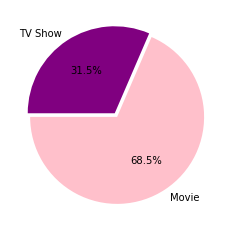

In [18]:
plt.pie(netflix_df.type.value_counts(), explode=(0.025,0.025), labels=netflix_df.type.value_counts().index, colors=['pink','purple'],autopct='%1.1f%%', startangle=180);

we can check what type of content (in this context whether adult or children) generally and for both movies and tv shows netflix releases more , we will do so by using the rating field as it describes whether a movie is suitable for adult or children.

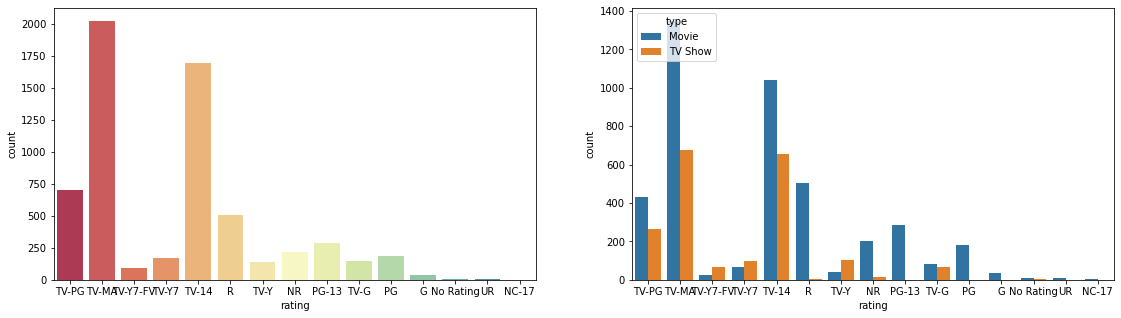

In [19]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
a1 = sns.countplot(x='rating',data=netflix_df,ax=ax[0], palette='Spectral')
a2 = sns.countplot(x='rating',data=netflix_df,hue=netflix_df.type,ax=ax[1],);

The line plot below shows the content (movies and tv shows) added over years before plotting it year 2020 was removed because from the metadata the last time it was updated was '2020-01-20' 

In [20]:
netflix_year = netflix_df['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
netflix_year = netflix_year[netflix_year.year != 2020]

netflix_year2 = netflix_df[['type','year_added']]

movie_year = netflix_year2[netflix_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movie_year = movie_year[movie_year.year != 2020]

show_year = netflix_year2[netflix_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
show_year = show_year[show_year.year != 2020]

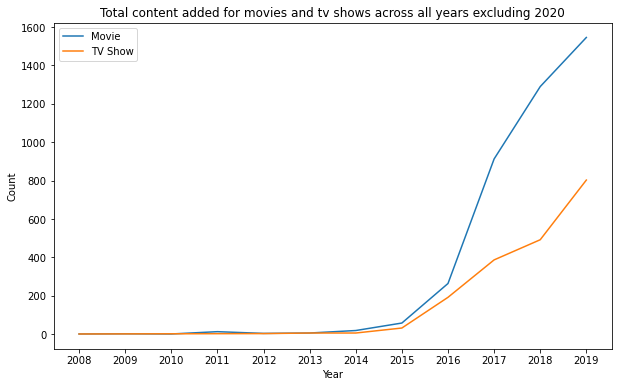

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=show_year, x='year', y='count')
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("Total content added for movies and tv shows across all years excluding 2020")
plt.legend(['Movie','TV Show'])
plt.ylabel("Count")
plt.xlabel("Year");

to plot the duration for both type of content i changed the name of the field to 'Seasons' in the shows dataframe, removed the suffix 'seasons' and 'mins' and converted the field to an integer in both dataframe to be able to plot it

In [22]:
netflix_movies_df.duration = netflix_movies_df.duration.str.replace(' min','').astype(int)
netflix_shows_df.rename(columns={'duration':'seasons'}, inplace=True)
netflix_shows_df.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)
netflix_shows_df.seasons = netflix_shows_df.seasons.str.replace(' Seasons','').astype(int)

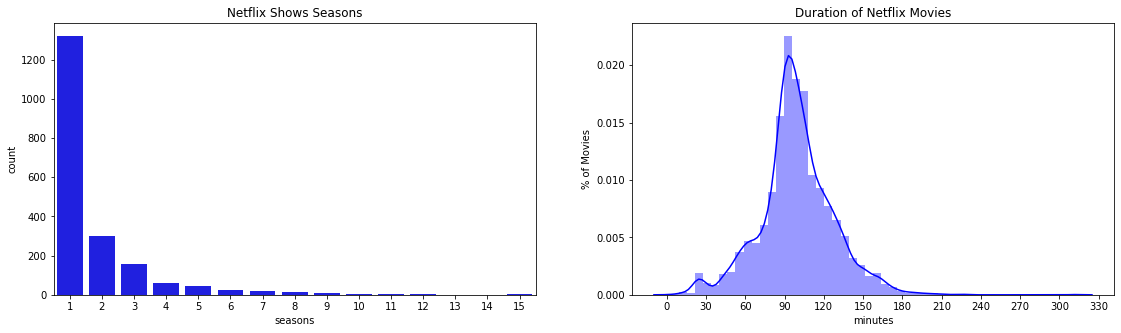

In [23]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
c1 = sns.countplot(netflix_shows_df['seasons'], color='blue',ax=ax[0])
c1.set_title("Netflix Shows Seasons")
c2 = sns.distplot(netflix_movies_df['duration'], color='blue',ax=ax[1])
c2.set_xticks(np.arange(0,360,30))
c2.set_title("Duration of Netflix Movies")
c2.set_ylabel("% of Movies")
c2.set_xlabel("minutes");

In [7]:
import jovian

In [24]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "alayandeay98/course-project-netflix-movies-and-tvshows" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/alayandeay98/course-project-netflix-movies-and-tvshows


'https://jovian.ml/alayandeay98/course-project-netflix-movies-and-tvshows'

## Asking and Answering Questions




What are the top 10 Genres on netflix?

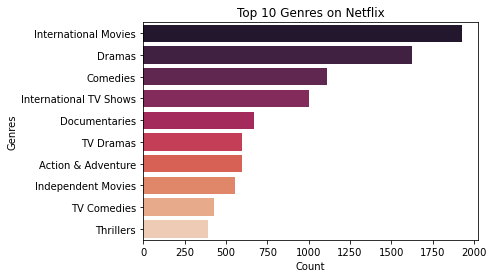

In [25]:
netflix_genres=netflix_df['listed_in'].str.split(', ', expand=True).stack().reset_index(drop=True)
sns.countplot(y = netflix_genres, order=netflix_genres.value_counts().index[:10], palette='rocket')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show();

What are the top 10 Genres in both movies and tv shows on netflix?

In [26]:
netflix_movies_genres=netflix_movies_df['listed_in'].str.split(', ', expand=True).stack().reset_index(drop=True)
netflix_shows_genres=netflix_shows_df['listed_in'].str.split(', ', expand=True).stack().reset_index(drop=True)

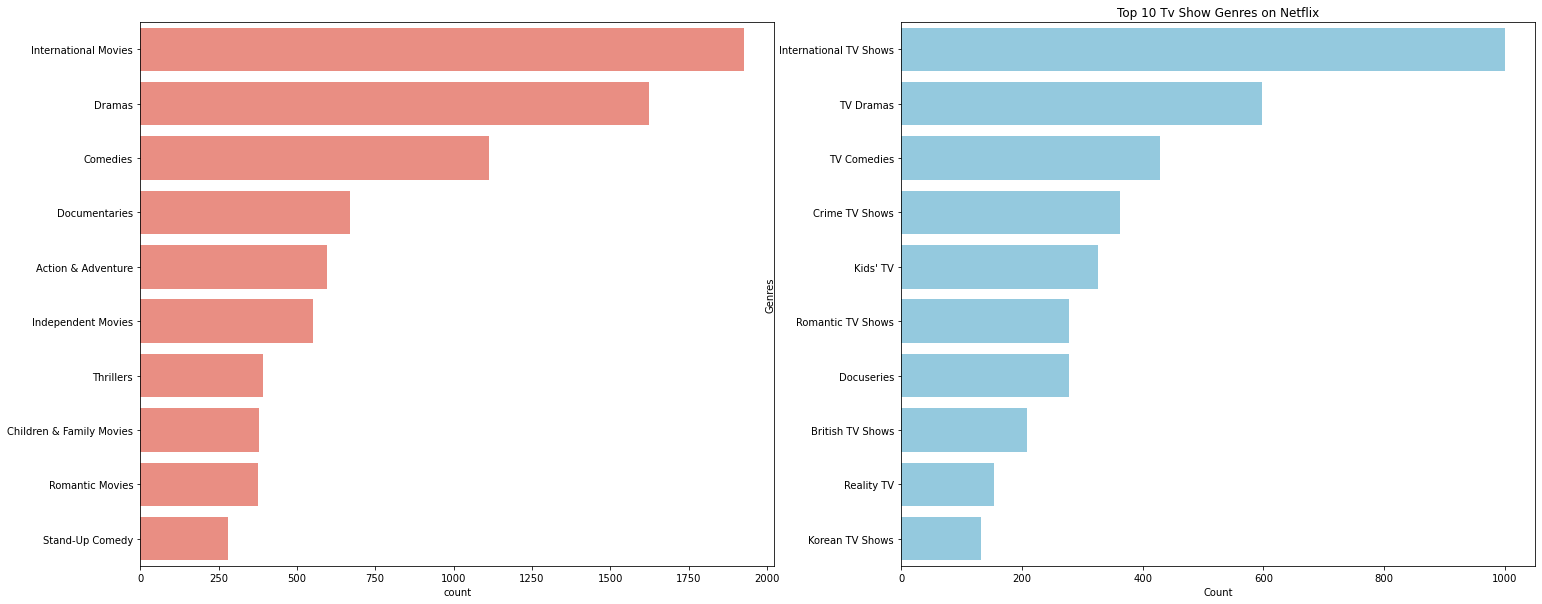

In [27]:
fig, ax = plt.subplots(1,2, figsize=(25, 10))
d1 = sns.countplot(y=netflix_movies_genres, order=netflix_movies_genres.value_counts().index[:10], color='salmon',ax=ax[0])
plt.title('Top 10 Movie Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genres')

d2 = sns.countplot(y=netflix_shows_genres,order=netflix_shows_genres.value_counts().index[:10], color='skyblue',ax=ax[1])
plt.title('Top 10 Tv Show Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genres');

What are the top 10 years with the most releases?

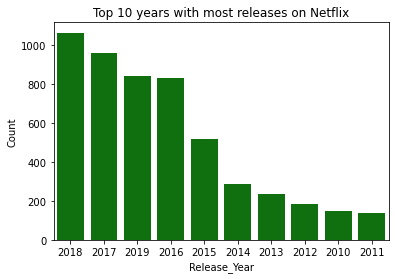

In [28]:
sns.countplot(x=netflix_df['release_year'], order=netflix_df['release_year'].value_counts().index[:10], color='green')
plt.title('Top 10 years with most releases on Netflix')
plt.xlabel('Release_Year')
plt.ylabel('Count')
plt.show();

Who are the top 10 directors on Netflix with the most releases?

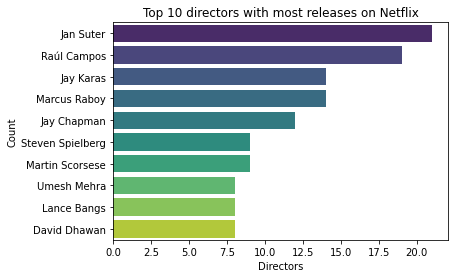

In [29]:
directors = netflix_df[netflix_df.director != 'No Director'].director.str.split(', ', expand=True).stack().reset_index(drop=True)
sns.countplot(y =directors, order=directors.value_counts().index[:10], palette='viridis')
plt.title('Top 10 directors with most releases on Netflix')
plt.xlabel('Directors')
plt.ylabel('Count')
plt.show();

What are the top 10 producing countries?

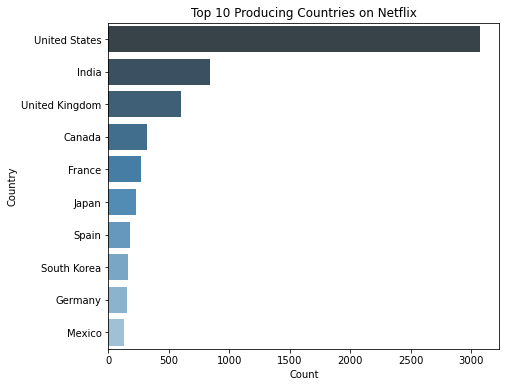

In [30]:
countries=netflix_df['country'].str.split(', ', expand=True).stack().reset_index(drop=True)


plt.figure(figsize=(7,6))
b = sns.countplot(y = countries, order=countries.value_counts().index[:10], palette="Blues_d")
plt.title('Top 10 Producing Countries on Netflix')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show();

In [9]:
import jovian

In [31]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "alayandeay98/course-project-netflix-movies-and-tvshows" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/alayandeay98/course-project-netflix-movies-and-tvshows


'https://jovian.ml/alayandeay98/course-project-netflix-movies-and-tvshows'

## Inferences and Conclusion

TODO

-The duration of movies are in minutes while that of tv shows are in seasons

-There are more movies on netflix than tv shows

-There are more of adult content than children content for both movies and tv shows

-Most movies and tv shows were added in year 2019

-Most movies have only one season while most  movies are between 90 to 120 minutes

-Year 2018 has the highest number of releases

-United States produced the most content of all the countries

In [11]:
import jovian

In [32]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "alayandeay98/course-project-netflix-movies-and-tvshows" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/alayandeay98/course-project-netflix-movies-and-tvshows


'https://jovian.ml/alayandeay98/course-project-netflix-movies-and-tvshows'

## References and Future Work

TODO

In [13]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
